In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("uber.csv")

# Show basic info
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe(include='all'))


Shape of dataset: (200000, 9)

Column names:
 Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

Data types:
 Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Missing values:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Summary statistics:
           Unnamed: 0                          key    fare_amount  \
count   2.000000e+05                       200000  200000.000000   
unique           NaN                       200000            NaN   
top

In [2]:
# Drop rows with too many missing values
df = df.dropna(how='any')  # Or use .fillna() if appropriate

# Drop duplicates
df = df.drop_duplicates()

# Convert datetime columns
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Create new columns (feature engineering)
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.dayofweek
df['peak_hour'] = df['hour'].apply(lambda x: 'Yes' if 7 <= x <= 9 or 16 <= x <= 18 else 'No')


In [3]:
# Export cleaned dataset
df.to_csv("uber_cleaned.csv", index=False)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("uber_cleaned.csv")


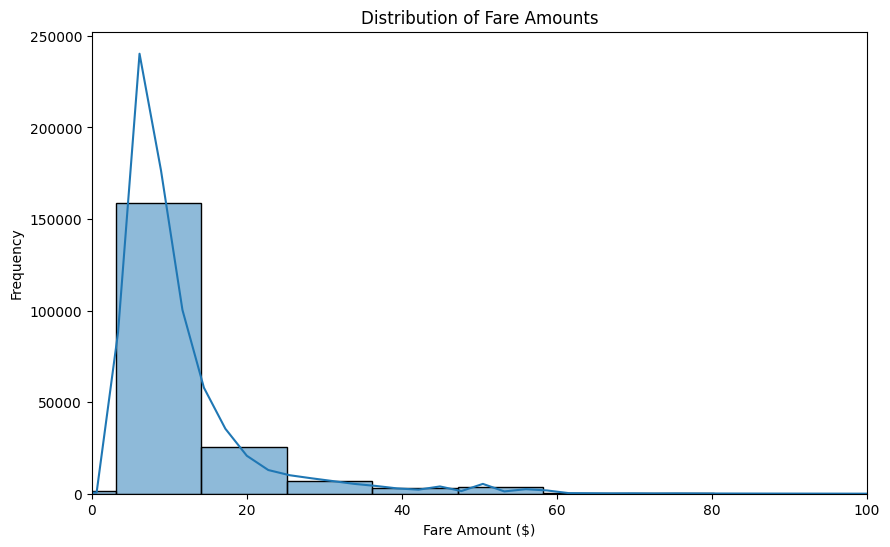

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Distribution of Fare Amounts")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.xlim(0, 100)  # adjust as needed
plt.show()


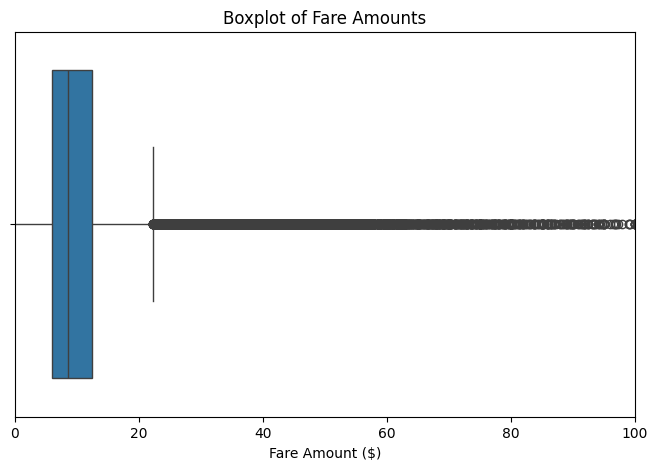

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['fare_amount'])
plt.title("Boxplot of Fare Amounts")
plt.xlabel("Fare Amount ($)")
plt.xlim(0, 100)  # adjust as needed
plt.show()


In [12]:
import numpy as np

# Define the haversine formula to calculate distance in kilometers
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Earth radius = 6371 km
    return km

# Apply the formula to the dataset
df['distance'] = haversine(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude']
)


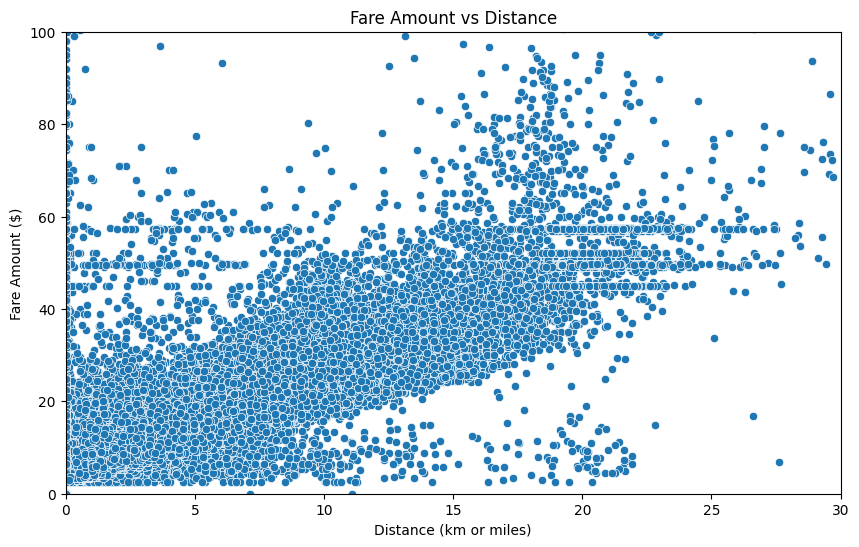

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='fare_amount', data=df)
plt.title("Fare Amount vs Distance")
plt.xlabel("Distance (km or miles)")
plt.ylabel("Fare Amount ($)")
plt.xlim(0, 30)  # adjust as needed
plt.ylim(0, 100)
plt.show()


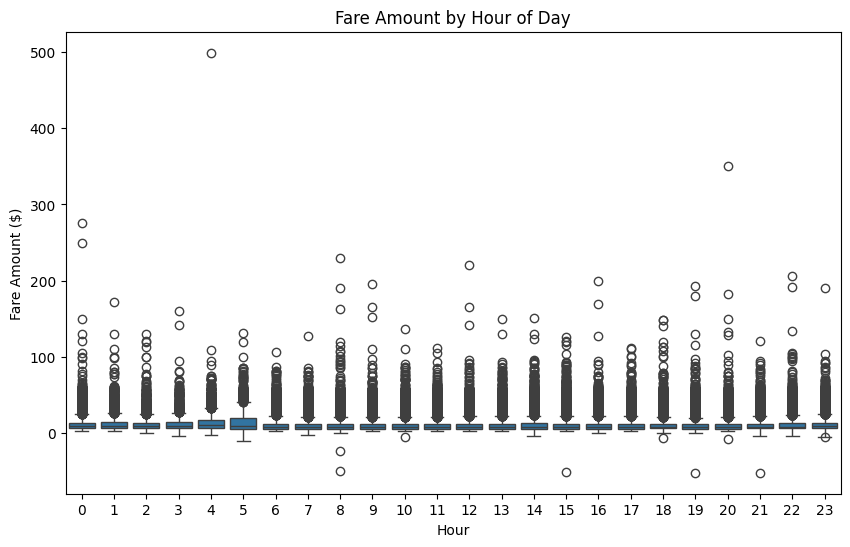

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title("Fare Amount by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Fare Amount ($)")
plt.show()


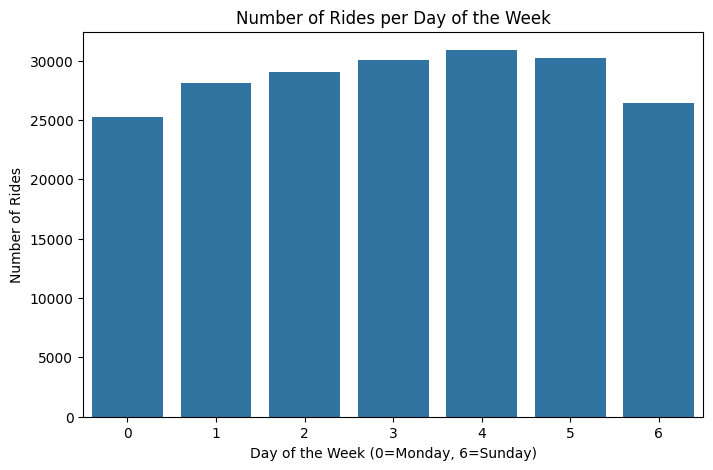

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='weekday', data=df)
plt.title("Number of Rides per Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Rides")
plt.show()


In [16]:
import pandas as pd

# Load dataset (if not already loaded)
df = pd.read_csv("uber_cleaned.csv")

# Extract features from pickup_datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['year'] = df['pickup_datetime'].dt.year

# Peak hour indicator (typically morning and evening rush)
df['peak_hour'] = df['hour'].apply(lambda x: 'Yes' if 7 <= x <= 9 or 16 <= x <= 18 else 'No')

# Save final enhanced dataset for Power BI
df.to_csv("uber_enhanced.csv", index=False)
